In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [30]:
import seaborn as sns

In [3]:
import numpy as np

In [4]:
from sklearn.model_selection import train_test_split

# Loading and Analysing DATA

In [6]:
df=pd.read_csv(r"C:\Users\A_R_COMPUTERS\Downloads\Iris.csv")

In [7]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
df.shape

(150, 6)

In [10]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [11]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Data Visualisation

In [22]:
fig = plt.figure(figsize=(10,7))

<Figure size 720x504 with 0 Axes>

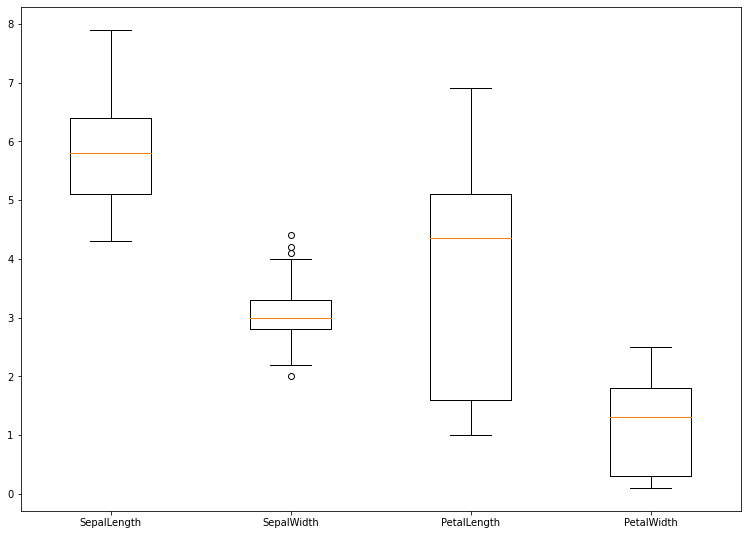

In [21]:
fig = plt.figure(figsize=(10,7))
  
  
  

ax = fig.add_axes([0, 0, 1, 1])



bp = ax.boxplot(df.drop(["Species","Id"],axis=1))

ax.set_xticklabels(['SepalLength', 'SepalWidth', 
                    'PetalLength', 'PetalWidth'])
  

plt.show()

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


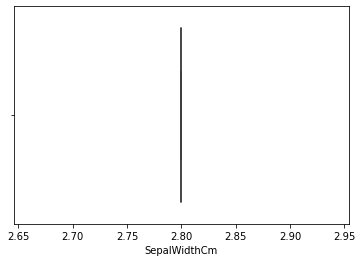

In [42]:
q1,q3 = np.percentile(df['SepalWidthCm'],[25,75])
iqr = q3-q1
lower_fence = q1 - (1.5*iqr)
upper_fence = q3 + (1.5*iqr)
df['SepalWidthCm'] = df['SepalWidthCm'].apply(lambda x: upper_fence if x>upper_fence 
                                                  else lower_fence if x<lower_fence else x)
sns.boxplot(df['SepalWidthCm']);


D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


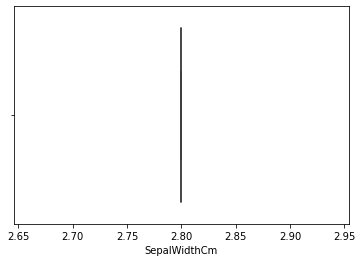

In [40]:
sns.boxplot(df['SepalWidthCm']);


D:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warni

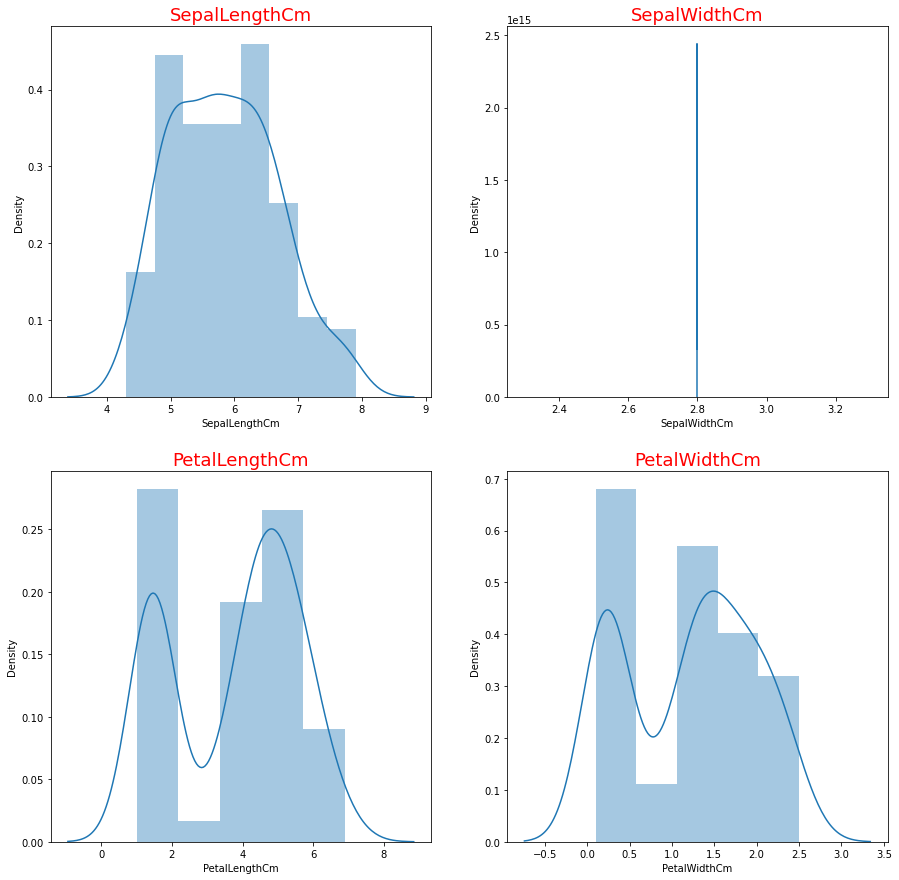

In [43]:
fig=plt.figure(figsize=(15,15))
for i in range(1,5):
    ax=fig.add_subplot(2,2,i)
    sns.distplot(df[df.columns[i]])
    ax.set_title(df.columns[i],color='red',fontsize=18)
plt.show()

# Data Inspection

In [44]:
from sklearn.preprocessing import LabelEncoder

In [45]:
encode=LabelEncoder()
df["Target"]=encode.fit_transform(df["Species"])


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
 6   Target         150 non-null    int32  
dtypes: float64(4), int32(1), int64(1), object(1)
memory usage: 7.7+ KB


# Building Data

In [49]:
X= df.drop(["Species","Id","Target"], axis = 1)

In [50]:
y= df["Target"]

In [51]:
X_train,X_test,Y_train,Y_test= train_test_split(X,y,test_size=0.35, random_state=2021)

# Building Model

In [53]:
from sklearn.tree import DecisionTreeClassifier

dtree=DecisionTreeClassifier(criterion='gini',max_depth=3)
dtree.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3)

# Decision Tree

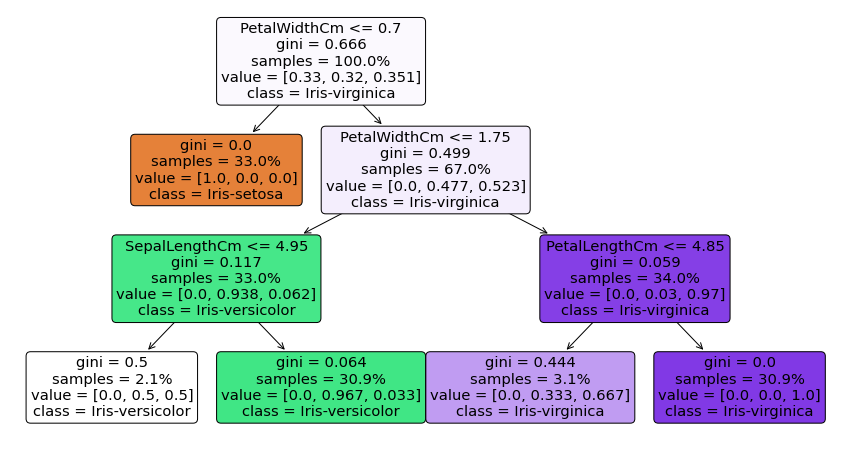

In [54]:
from sklearn import tree

FeatureNames=['SepalLengthCm', 'SepalWidthCm', 
                    'PetalLengthCm', 'PetalWidthCm']
plt.figure(figsize = (15,8))
tree.plot_tree(dtree, feature_names= FeatureNames , class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], 
               filled = True, precision = 3,proportion =True, rounded = True)
plt.show()

# Prediction

In [55]:

y_pred=dtree.predict(X_test)
print(y_pred)

[0 0 1 0 0 0 0 0 0 0 0 1 2 2 1 2 1 1 0 1 1 2 1 0 1 1 1 1 0 0 1 1 0 2 1 1 2
 0 2 1 2 2 0 1 1 1 2 2 1 1 2 0 2]
